# Donald Trump Communication Analysis on Twitter

First let's import pyspark and create a SparkContext

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import pyspark
sc = pyspark.SparkContext(appName="Trump sentiment Analysis")

# Table of content
# Global overview of the tweets
# I-seasonality and trends:
 * For all the tweets <br/>
 * For tweets<br/>
 * For retweets
# II-Top hashtags
# III-Top References
# IV-Top contextual words or hot topics
# V-Top positives and top negatives words used
# VI-Overall sentiment scores (from positives and negatives words)

# I-Global Overview of the tweets+retweets(all the data) 

In [5]:
#We load our tweets
tweets = sc.textFile('trump_tweets_text_date.txt')
tweets.take(5)

['White House news conference today at 5:30 P.M. Eastern. Thank you!,04-15-2020 20:49:31',
 'We are having very productive calls with the leaders of every sector of the economy who are all-in on getting America back to work and soon. More to come! #MAGA,04-15-2020 19:02:47',
 'My condolences to the Steinbrenner family and the entire @Yankees Organization on the passing of Hank Steinbrenner. He was a friend and will be missed greatly by all! https://t.co/nHsO7Wy0oM,04-15-2020 15:48:05',
 '#ThanksForDelivering @UPS! https://t.co/4Sis7Tme17,04-15-2020 15:39:58',
 'RT @USNavy: Hard at work in #NYC.#USNavy Sailors provide care for trauma emergency and urgent care patients without regard to their #CO…,04-15-2020 15:39:13']

We've generated a list of words from our tweets We've removed the **"htpps" links** from our tweets.<br/> They won't be useful for our analysis.

In [6]:
#remove the link
word=tweets.flatMap(lambda line: line.split(",")).flatMap(lambda line: line.split()).filter(lambda w: 'https' not in w)
#first 10 words                    
word.take(10)

['White',
 'House',
 'news',
 'conference',
 'today',
 'at',
 '5:30',
 'P.M.',
 'Eastern.',
 'Thank']

In [7]:
# write your code here
trend = tweets.map(lambda line: line.split(",")[-1]).map(lambda line: line.split(" ")[0]).map(lambda line: pd.to_datetime(line)).map(lambda date: (date, 1)).reduceByKey(lambda a,b : a + b).sortBy(lambda tuple: tuple[1], ascending=False)

trend_list=trend.collect()

In [8]:
import pandas as pd
df = pd.DataFrame(trend_list,columns=['Date','Count']  
    ).sort_values('Date',ascending=True)

In [9]:
# We transforme the type of date column into a date type the  we put the 'Date column' as index
df['Date']=pd.to_datetime(df['Date'])
df.set_index("Date",inplace=True)

In [10]:
df.head()

,Count
Date,
2014-12-31,6
2015-01-01,22
2015-01-02,35
2015-01-03,24
2015-01-04,48


#### Evolution of tweets(tweets and retweets) in the year

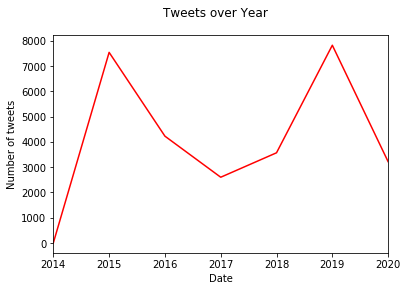

In [11]:
def ploting(df,title="",periode='Y', xlabel='Date', ylabel='Number of tweets'):
    Year=df.Count.resample(periode).sum()
    plt.gca().set(xlabel=xlabel, ylabel=ylabel)
    Year.plot(subplots = True, title=title, color='red')
    plt.show()
ploting(df, title='Tweets over Year',periode='Y')   

As we can see that the number of tweets start to increase dramatically from 2014 to reach a pic of 7500 tweet in 2015 and then start decreasing until it reaches at 2017 about 3000 tweet then start to increase and reach other pic in 2019 which is equal to 7800 tweet and then start to decrease again.

#### Trend and seasonality over Year

In [12]:
%matplotlib inline

C:\Users\jm_ma\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


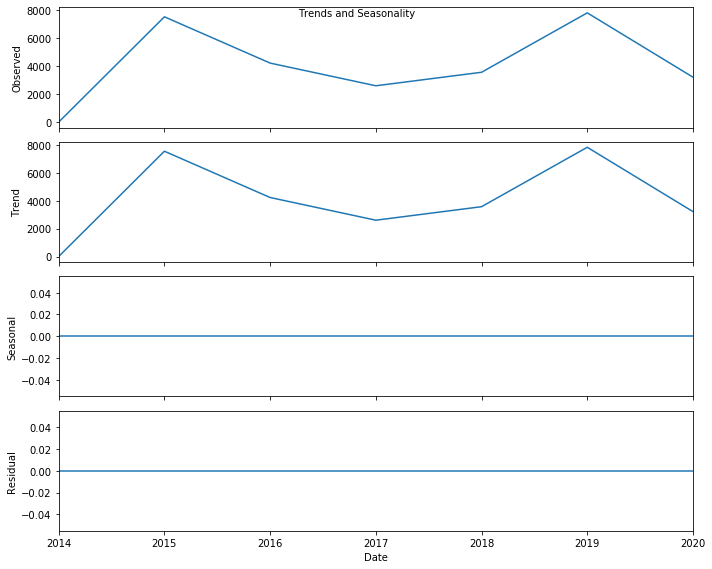

In [13]:
def trend_seasonal(df,model='additive',titlesize="",periode='Y'):
    plt.rcParams.update({'figure.figsize': (10,8)})
    Year=df.Count.resample(periode).sum()
    trend_seasonal= seasonal_decompose(Year, model='additive')
    trend_seasonal.plot().suptitle('Trends and Seasonality', fontsize=titlesize)
    plt.show()
trend_seasonal(df,model='additive',titlesize=10,periode='Y')

### Evolution of tweets + retweets per Month

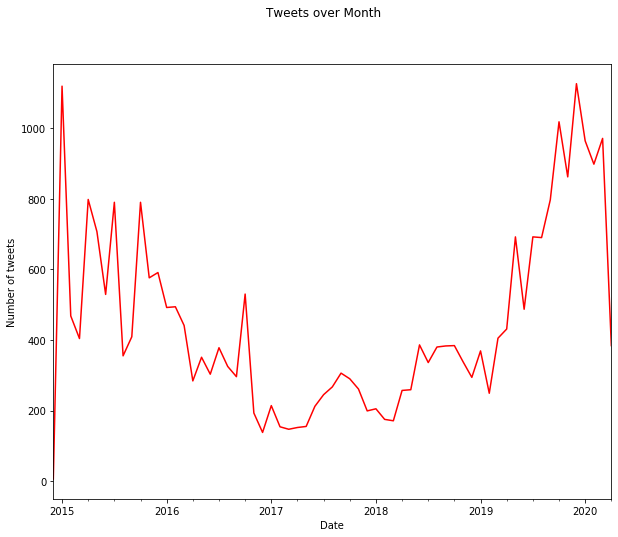

In [14]:
ploting(df, title='Tweets over Month',periode='M') 

### Trend and seasonality over Month

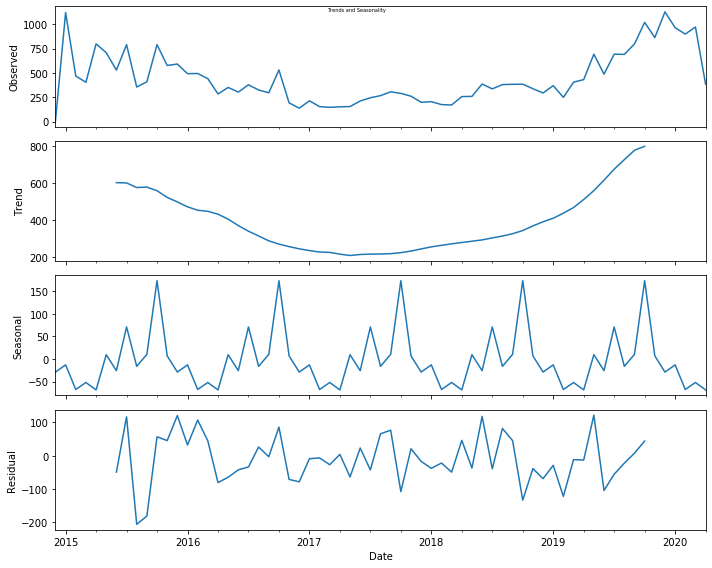

In [15]:
trend_seasonal(df,model='additive',titlesize=5,periode='M')

What we can see is that there is an observed trend and seasonality of tweets.

# II-seasonality and trends for tweets and Retweets

### For  the tweets only

In [16]:
# write your code here
trend_tweets = tweets.filter(lambda line : line.startswith('RT')).map(lambda line: line.split(",")[-1]).map(lambda line: line.split(" ")[0]).map(lambda line: pd.to_datetime(line)).map(lambda date: (date, 1)).reduceByKey(lambda a,b : a + b).sortBy(lambda tuple: tuple[1], ascending=False)

trend_tweets_list=trend_tweets.collect()

In [17]:
df_tweets = pd.DataFrame(trend_tweets_list,columns=['Date','Count']  
    ).sort_values('Date',ascending=True)
df_tweets['Date']=pd.to_datetime(df_tweets['Date'])
df_tweets.set_index("Date",inplace=True)
df_tweets.head()

,Count
Date,
2016-01-03,1
2016-01-07,1
2016-01-13,1
2016-01-15,1
2016-01-19,1


### Evolution of tweets over Year

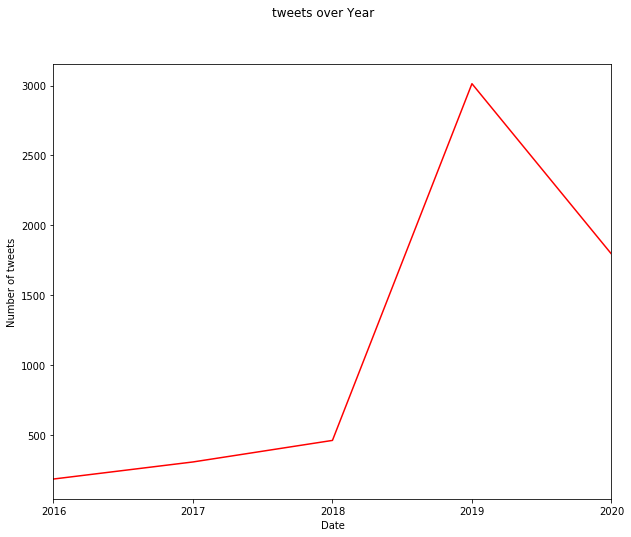

In [18]:
ploting(df_tweets, title='tweets over Year',periode='Y',xlabel='Date', ylabel='Number of tweets')

####  tweetsTrend and seasonality over Year

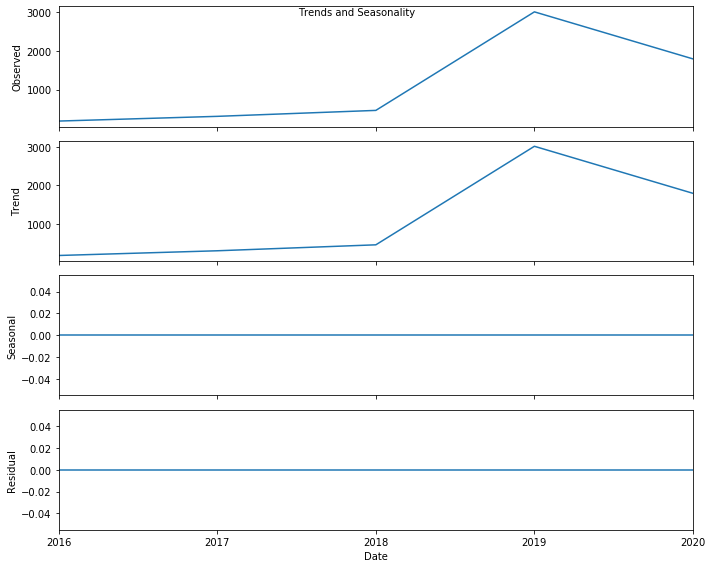

In [19]:
trend_seasonal(df_tweets,model='additive',titlesize=10,periode='Y')

### Evolution of tweets per Month

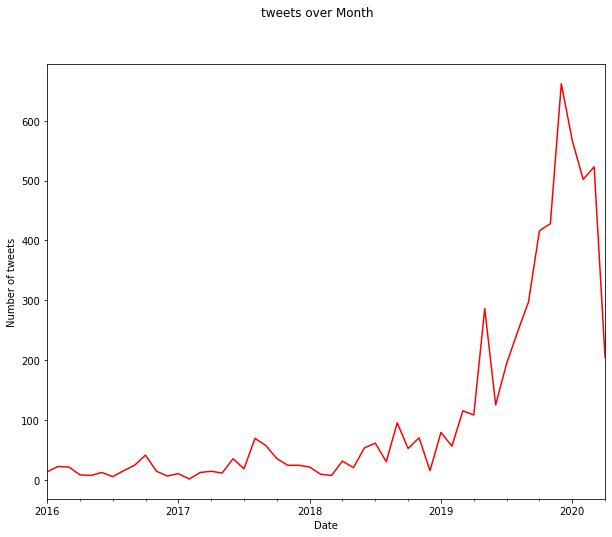

In [20]:
ploting(df_tweets, title='tweets over Month',periode='M') 

### tweetsTrend and seasonality over Month


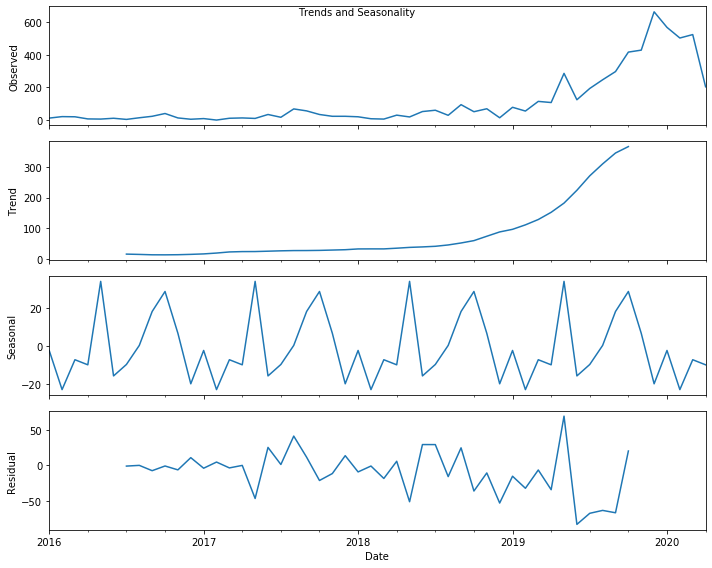

In [21]:
trend_seasonal(df_tweets,model='additive',titlesize=10,periode='M')

### For all the retweets only

In [22]:
# write your code here
trend_retweets = tweets.filter(lambda line : line.startswith('RT')).map(lambda line: line.split(",")[-1]).map(lambda line: line.split(" ")[0]).map(lambda line: pd.to_datetime(line)).map(lambda date: (date, 1)).reduceByKey(lambda a,b : a + b).sortBy(lambda tuple: tuple[1], ascending=False)

trend_retweets_list=trend_retweets.collect()

In [23]:
df_retweets = pd.DataFrame(trend_retweets_list,columns=['Date','Count']  
    ).sort_values('Date',ascending=True)
df_retweets['Date']=pd.to_datetime(df_retweets['Date'])
df_retweets.set_index("Date",inplace=True)
df_retweets.head()

,Count
Date,
2016-01-03,1
2016-01-07,1
2016-01-13,1
2016-01-15,1
2016-01-19,1


### Evolution of retweets over Year

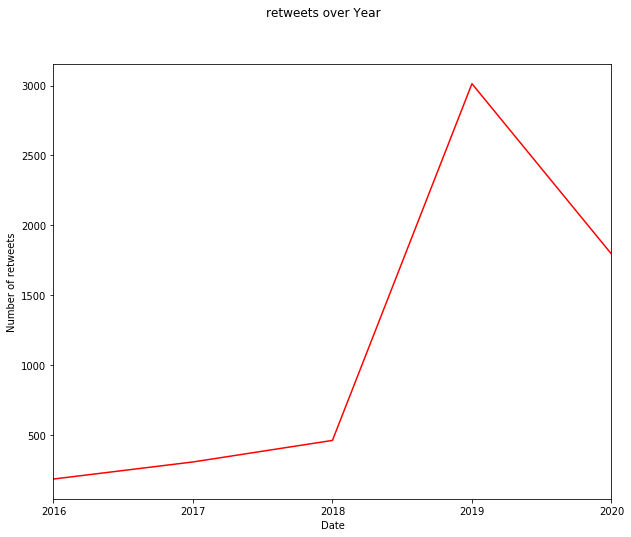

In [24]:
ploting(df_retweets, title='retweets over Year',periode='Y',xlabel='Date', ylabel='Number of retweets')

####  RetweetsTrend and seasonality over Year

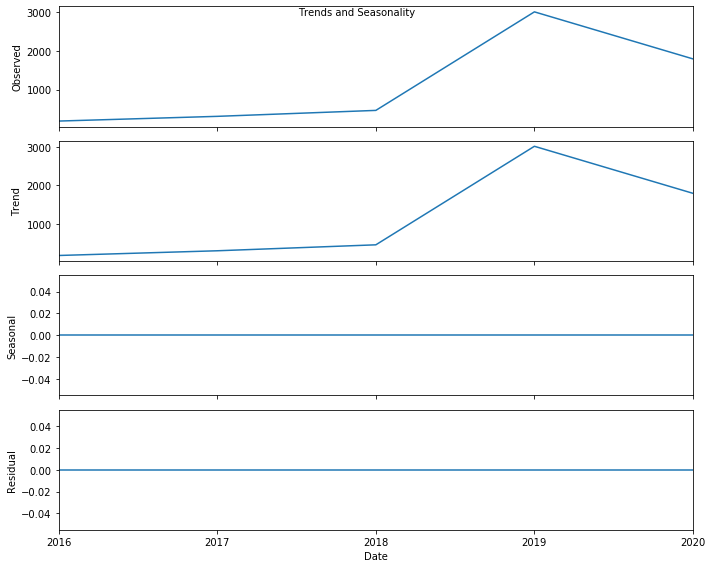

In [25]:
trend_seasonal(df_retweets,model='additive',titlesize=10,periode='Y')

### Evolution of retweets per Month

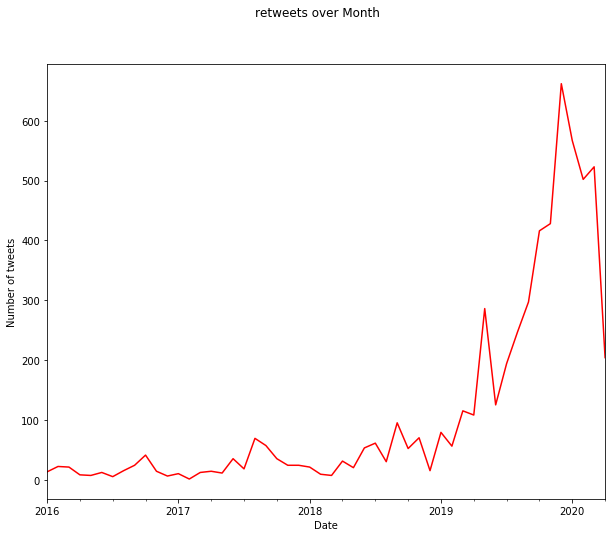

In [26]:
ploting(df_retweets, title='retweets over Month',periode='M') 

### RetweetsTrend and seasonality over Month


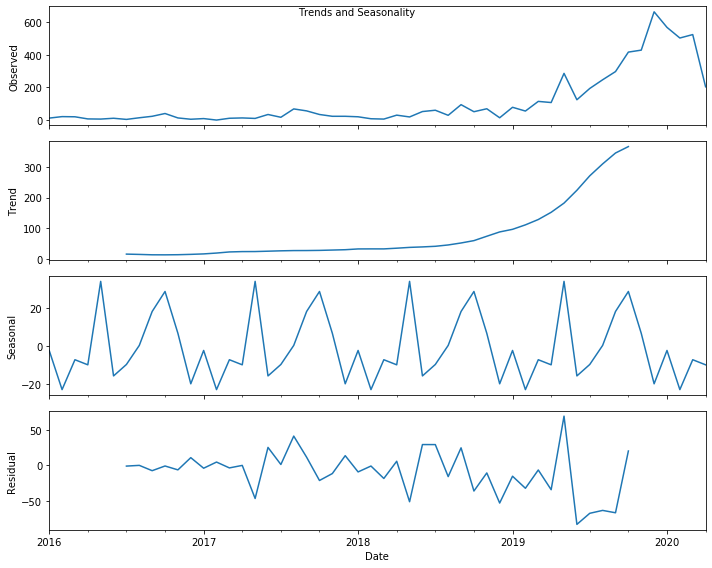

In [27]:
trend_seasonal(df_retweets,model='additive',titlesize=10,periode='M')

# Top Hashtag

In [35]:
hashtag=word.filter(lambda line : line.startswith('#')).map(lambda line : line.strip('"')).map(lambda word: (word, 1))\
            .reduceByKey(lambda a,b : a + b)\
            .sortBy(lambda tuple: tuple[1], ascending=False)
Top_5_hashtag=hashtag.take(5)

In [41]:
def plot_top(df,Top_5_hashtag,columns_1='Hashtag',columns_2='Count'):
    pd_df = pd.DataFrame(Top_5_hashtag,columns=[columns_1,columns_2]  
    ).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (13, 8) )
    chart=sns.barplot(data=pd_df, x=columns_1, y=columns_2, order=pd_df[columns_1])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    plt.show()

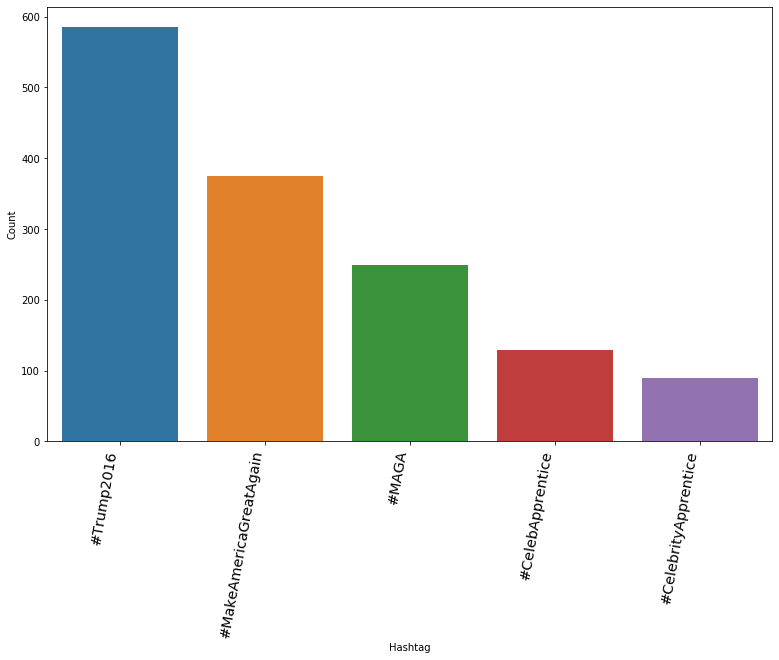

In [43]:
plot_top(df,Top_5_hashtag,columns_1='Hashtag',columns_2='Count')

This is the list of the most used hashtags and we can see that the second most repeated one is Trump2016 which about 600 appearance, then most repeated  one is MakeAmericaGreatAgain which is the same as MAGA with about 700 tweets if we combine them


# Top Reference

In [38]:
#reference
reference=word.filter(lambda line : line.startswith('@')).map(lambda line : line.strip(':')).map(lambda word: (word, 1))\
            .reduceByKey(lambda a,b : a + b)\
            .sortBy(lambda tuple: tuple[1], ascending=False)
top_5_reference=reference.take(5)

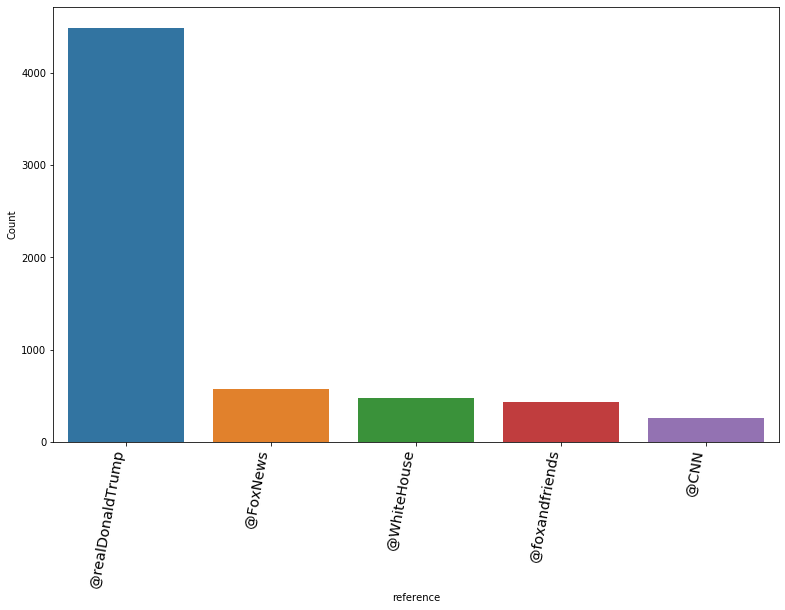

In [39]:
plot_top(df,top_5_reference,columns_1='reference',columns_2='Count')

For the top reference, we can notice that realdonaldtrump is the first with about more than 4000 tweet, second one is FoxNews with less than 1000 tweets, then its WhiteHouse,Foxandfriends, CNN with less than 1000 tweets all of them

##  <span style="color:red"> Top positives and top negatives words used </span>

Extracting tweets reviews words

In [44]:
rdd_sentiment=tweets.map(lambda line: line.split(",")[0])\
.flatMap(lambda line: line.split())\
.map(lambda line : line.strip(':,RT,@,#,:'))\
.filter(lambda w: 'https' not in w)\
.filter(lambda word: word!='')

rdd_sentiment.take(5)

['White', 'House', 'news', 'conference', 'today']

In [45]:
# initialize an rdd with key/value for counting each word in the file 

rdd_sentiment_kv = rdd_sentiment.map(lambda word: (word, 1))

rdd_sentiment_kv.take(5)

[('White', 1), ('House', 1), ('news', 1), ('conference', 1), ('today', 1)]

Extracting top positives words  

In [46]:
# we read the positive words

rdd_positive_words = sc.textFile('positive-words.txt')

rdd_positive_words.take(5)

['a+', 'abound', 'abounds', 'abundance', 'abundant']

In [47]:
# initialize an rdd with key/value for counting each positive word in the file 


rdd_positive_words_kv = rdd_positive_words.map(lambda word: (word, 1))

rdd_positive_words_kv.take(5)

[('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1), ('abundant', 1)]

In [48]:
# rdd_positive_words_product_kv RDD should contain positive words in the product review file

rdd_positive_words_product_kv = rdd_sentiment_kv.join(rdd_positive_words_kv)

rdd_positive_words_product_kv.take(5)

[('work', (1, 1)),
 ('work', (1, 1)),
 ('work', (1, 1)),
 ('work', (1, 1)),
 ('work', (1, 1))]

In [49]:
# use the mapValues transformation to assign a default count of 1 for each positive word

rdd_positive_words_product_kv = rdd_positive_words_product_kv.mapValues(lambda tuple: 1)

rdd_positive_words_product_kv.take(5)

[('work', 1), ('work', 1), ('work', 1), ('work', 1), ('work', 1)]

In [50]:
# rdd_positive_words_product_count_kv should contain the number of occurences (count) of each positive word in product reviews

rdd_positive_words_product_count_kv = rdd_positive_words_product_kv.reduceByKey(lambda x,y : x+y)


rdd_positive_words_product_count_kv.take(5)

[('work', 400),
 ('favorite', 52),
 ('good', 678),
 ('wonderful', 304),
 ('like', 943)]

In [51]:
# rdd_positive_words_product_count_kv_ordered should contain the previous RDD in descending order based on the count

rdd_positive_words_product_count_kv_ordered = rdd_positive_words_product_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_positives_opinion = rdd_positive_words_product_count_kv_ordered.take(25)

list_top_positives_opinion

[('great', 2410),
 ('like', 943),
 ('good', 678),
 ('love', 411),
 ('work', 400),
 ('best', 395),
 ('win', 387),
 ('right', 371),
 ('better', 354),
 ('support', 350),
 ('strong', 312),
 ('wonderful', 304),
 ('honor', 304),
 ('well', 277),
 ('thank', 227),
 ('important', 211),
 ('amazing', 203),
 ('incredible', 197),
 ('protect', 187),
 ('won', 182),
 ('nice', 178),
 ('ready', 171),
 ('tough', 170),
 ('proud', 163),
 ('beautiful', 154)]

This is the list of the most used positive words in the tweets, we can see that the word ‘great’ is the first with frequency of 2410 appearance, second is ‘like’ with 943 appearance, ‘love’ is fourth with 411 appearance.

Extracting top negatives words from product reviews 

In [52]:
rdd_negative_words = sc.textFile("C:\\Users\\jm_ma\\Documents\\spark cours\\TBSeeds Dossier de candidature Promo janvier 2020-20191121\\Exercises Solutions Notebooks-20200510\\negative-words.txt")

rdd_negative_words.take(10)

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [53]:
# initialize an rdd with key/value for counting each negative word in the file 

rdd_negative_words_kv = rdd_negative_words.map(lambda word: (word, 1))

rdd_negative_words_kv.take(5)

[('2-faced', 1),
 ('2-faces', 1),
 ('abnormal', 1),
 ('abolish', 1),
 ('abominable', 1)]

In [54]:
# rdd_negative_words_product_kv RDD should contain negative words in the product review file

rdd_negative_words_product_kv = rdd_sentiment_kv.join(rdd_negative_words_kv)

rdd_negative_words_product_kv.take(4)

[('emergency', (1, 1)),
 ('emergency', (1, 1)),
 ('emergency', (1, 1)),
 ('emergency', (1, 1))]

In [55]:
# use the mapValues transformation to assign a default count of 1 for each negative word

rdd_negative_words_product_kv = rdd_negative_words_product_kv.mapValues(lambda tuple:1)

rdd_negative_words_product_kv.take(5)

[('emergency', 1),
 ('emergency', 1),
 ('emergency', 1),
 ('emergency', 1),
 ('emergency', 1)]

In [56]:
# rdd_negative_words_product_count_kv should contain the number of occurences (count) of each negative word in product reviews

rdd_negative_words_product_count_kv = rdd_negative_words_product_kv.reduceByKey(lambda x,y: x+y)

rdd_negative_words_product_count_kv.take(5)

[('emergency', 22),
 ('infections', 1),
 ('confusion', 3),
 ('worse', 62),
 ('lost', 187)]

In [57]:
# rdd_negative_words_product_count_kv_ordered should contain the previous RDD in descending order based on the count

rdd_negative_words_product_count_kv_ordered = rdd_negative_words_product_count_kv.sortBy(lambda tuple: tuple[1], ascending=False)

list_top_negatives_opinion = rdd_negative_words_product_count_kv_ordered.take(25)

list_top_negatives_opinion

[('bad', 452),
 ('hard', 373),
 ('illegal', 245),
 ('lost', 187),
 ('crime', 173),
 ('terrible', 168),
 ('ax', 159),
 ('phony', 158),
 ('wrong', 138),
 ('failed', 134),
 ('attack', 131),
 ('dishonest', 130),
 ('corrupt', 130),
 ('badly', 128),
 ('worst', 126),
 ('weak', 121),
 ('failing', 114),
 ('horrible', 108),
 ('false', 104),
 ('killed', 97),
 ('problem', 95),
 ('dangerous', 88),
 ('ridiculous', 85),
 ('lies', 78),
 ('losing', 78)]

This is the list of most used negative words in the tweets, the first one is ‘bad’ with 452 appearance, second one is ‘hard’ with 373 appearance, ‘illegal’ with 245 appearance :


###  <span style="color:green">  Visualizing polarized opinions from tweets </span>

In [58]:
from matplotlib import pyplot as plt
import seaborn as sb

import pandas as pd

def plot_opinion(list_positives, list_negatives):
    
    list_1 = [(t[0], t[1], 'positive') for t in list_positives]
    list_2 = [(t[0], t[1], 'negative') for t in list_negatives]
    
     
    list_1.extend(list_2)
    
    
    pd_df = pd.DataFrame({
     'Opinion': [ t[0] for t in list_1 ],
     'Count': [ t[1] for t in list_1 ],
     'polarity': [ t[2] for t in list_1 ]
    }).sort_values('Count', ascending=False)
    
    pd_df['color'] = pd_df.polarity.apply(lambda polarity: 'green' if polarity=='positive' else 'red')
    
    plt.figure( figsize = (15, 8) )
    chart=sb.barplot(data=pd_df, x='Opinion', y='Count', hue='polarity', palette=["green", "red"], order=pd_df['Opinion'])
    chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=80, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
    )
    
    for tick, color in zip(chart.get_xticklabels(), pd_df['color']): 
        tick.set_color(color)
    
    plt.show()

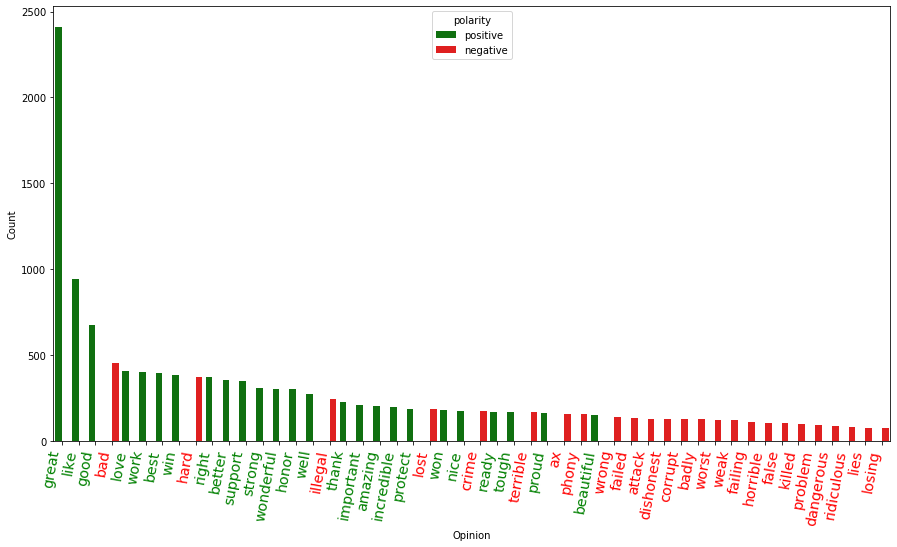

In [59]:
plot_opinion(list_top_positives_opinion, list_top_negatives_opinion)

What we can see is that positive words are used with more frequency than negative ones.


###  <span style="color:green">  Visualizing contextual words from tweets </span>

In [60]:
# we read our stop words

rdd_stop_words = sc.textFile('stopwords1.txt')

rdd_stop_words.take(5)

['about', 'above', 'across', 'after', 'again']

I create a input to add some order word in the **"stop-words.txt file"**

In [61]:
#new_stop_word = input("Please enter new stop words:\n")
#rdd_stop_words.append(new_stop_word)

In [62]:


contextual_words = rdd_sentiment.subtract(rdd_positive_words).subtract(rdd_negative_words).subtract(rdd_stop_words)

contextual_words.take(10)

['family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family',
 'family']

# Corona and Election

In [63]:


contextual_words_count_ordered = contextual_words.filter(lambda word: word.startswith('Covid') | word.startswith('vote'))\
                                                 .map(lambda line : line.strip(':,RT,@,#,:,",!,/hundreds'))\
                                                 .map(lambda word: (word, 1))\
                                                 .reduceByKey(lambda x,y : x+y)\
                                                 .sortBy(lambda tuple: tuple[1], ascending=False)

list_top_contextual_words = contextual_words_count_ordered.take(50)  

list_top_contextual_words

[('vot', 903),
 ('vote.', 46),
 ('votes.', 17),
 ('voters.', 13),
 ('vote…', 5),
 ('Covid-19', 5),
 ('votes)', 3),
 ('votes?', 2),
 ('vote?', 2),
 ('voted...', 2),
 ('votes/beat', 1),
 ('Covi', 1),
 ('voterfra', 1),
 ('vote👍', 1),
 ('votes."@Speaker…', 1),
 ('votes.”', 1),
 ('Covid-19.', 1),
 ('vote.”', 1),
 ('votes....', 1),
 ('voter…', 1),
 ('voteTrump', 1),
 ('vote-', 1),
 ('vote🤡', 1),
 ('voteTrump2016', 1),
 ('voters-', 1),
 ('vote-Rai', 1),
 ('voters.H', 1),
 ('voters…', 1),
 ('vote.I', 1),
 ('voter(gra', 1),
 ('Covid_19', 1),
 ('voters/support', 1),
 ('vote?🚨', 1),
 ('vote!👍🏻', 1),
 ('vote)', 1),
 ('voters!#MakeAmericaGreatAgai', 1),
 ('voter-fra', 1),
 ('Covid19', 1),
 ('vote....', 1)]

In [64]:
# the utility function plot_contextual_words plots a bar chart presenting top contextual words
# the parameter are list of tuples containing counts from contextual words

def plot_contextual_words(list_contextual_words):
    
    pd_df = pd.DataFrame({
        'Word':  [ t[0] for t in list_contextual_words ],
        'Count': [ t[1] for t in list_contextual_words ]
    }).sort_values('Count', ascending=False)
    
    plt.figure( figsize = (15, 8) )
    
    chart=sb.barplot(data=pd_df, x='Word', y='Count', order=pd_df['Word'], color='blue')
    
    chart.set_xticklabels(
        chart.get_xticklabels(), 
        rotation=80, 
        horizontalalignment='right',
        fontweight='light',
        fontsize='x-large',
        )
    
    plt.show()

C:\Users\jm_ma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jm_ma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jm_ma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jm_ma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jm_ma\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 57339 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Us

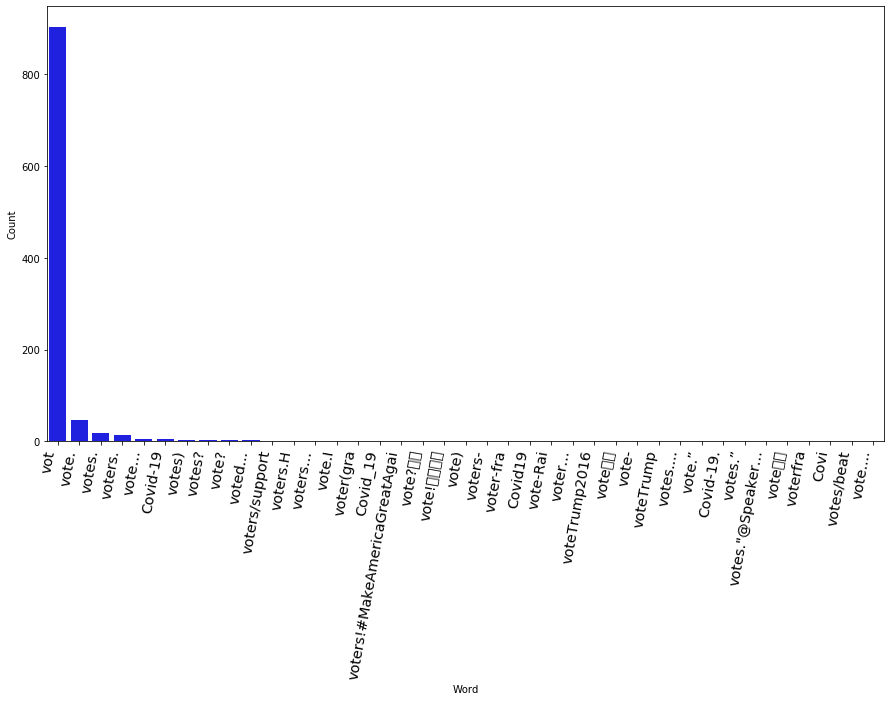

In [65]:
# call the plot_contextual_words function to plot our product reviews top contextual words

plot_contextual_words(list_top_contextual_words)

In this graph, we can observe that people are more concerned about the election more than corona, we see that for vote, the tweets related to votes and election syntax are more than the tweets related to corona.

# VI-Overall sentiment scores (from positives and negatives words)

In [66]:
sentiment_score = rdd_positive_words_product_count_kv.map(lambda tuple: tuple[1]).sum()\
                  - rdd_negative_words_product_count_kv.map(lambda tuple: tuple[1]).sum()

print('The sentiment score is : ',sentiment_score)

The sentiment score is :  5576


The sentiment score is positive so we can see that people feel more hope when it's relaed to the comparison of corona and next election